#Descargar e importar





In [14]:
!pip3 install keras-visualizer
from keras_visualizer import visualizer 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image

In [2]:
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0   290M      0  0:00:02  0:00:02 --:--:--  290M


In [3]:
!unzip -q kagglecatsanddogs_5340.zip

## Sacar algunas imagenes JFIF


In [4]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


## Generar Dataset

In [5]:
image_size = (64, 64)
batch_size = 128

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


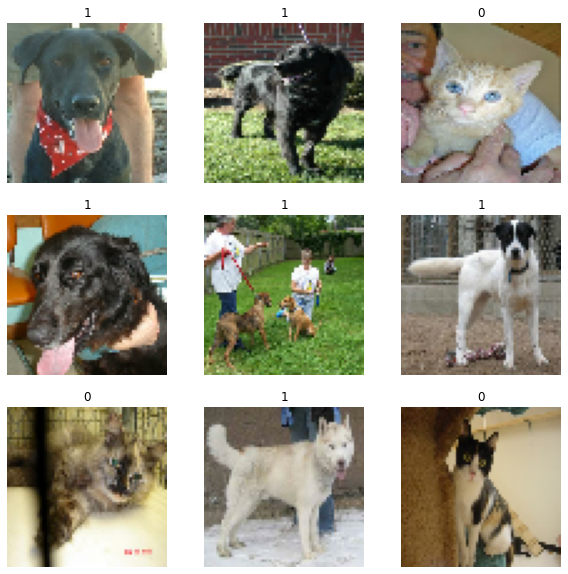

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [7]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

# Crear el modelo

In [8]:
model = keras.Sequential([
    keras.layers.Input(shape=(64,64,3,)),
    #keras.layers.Dense(512, activation='gelu', use_bias=True),
    keras.layers.Dense(512, activation='relu', use_bias=True),
    keras.layers.Dense(512, activation='selu', use_bias=True),
    keras.layers.Dense(512, activation='gelu', use_bias=True),
    keras.layers.Flatten(), 
    keras.layers.Dense(2, activation='softmax')
])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Ver el modelo

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64, 64, 512)       2048      
                                                                 
 dense_1 (Dense)             (None, 64, 64, 512)       262656    
                                                                 
 dense_2 (Dense)             (None, 64, 64, 512)       262656    
                                                                 
 flatten (Flatten)           (None, 2097152)           0         
                                                                 
 dense_3 (Dense)             (None, 2)                 4194306   
                                                                 
Total params: 4,721,666
Trainable params: 4,721,666
Non-trainable params: 0
_________________________________________________________________


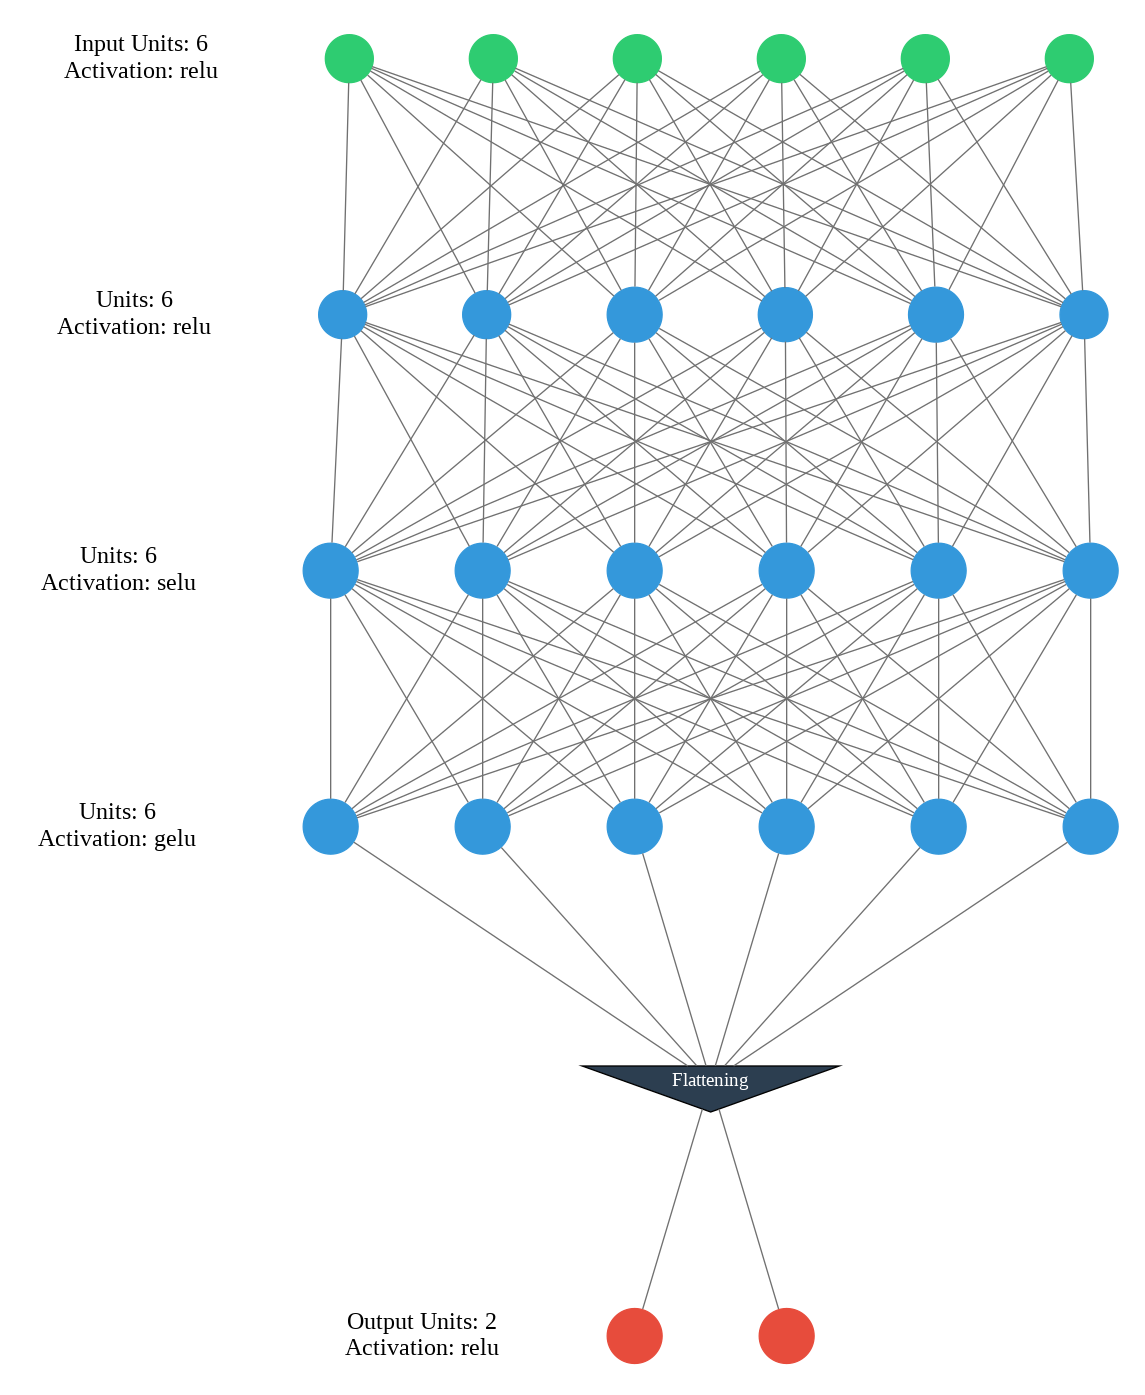

In [21]:
visualizer(model, format='png', view=True)
Image.open("graph.png")

# Entrenar el modelo


In [ ]:
model.fit(train_ds, epochs=20)

Epoch 1/10
147/147 [==============================] - 24s 143ms/step - loss: 700.9360 - accuracy: 0.5447
Epoch 2/10
147/147 [==============================] - 22s 145ms/step - loss: 16.9840 - accuracy: 0.6073
Epoch 3/10
147/147 [==============================] - 23s 152ms/step - loss: 5.9218 - accuracy: 0.6442
Epoch 4/10
147/147 [==============================] - 22s 146ms/step - loss: 2.7054 - accuracy: 0.6784
Epoch 5/10
147/147 [==============================] - 22s 145ms/step - loss: 1.9380 - accuracy: 0.7022
Epoch 6/10
147/147 [==============================] - 22s 147ms/step - loss: 1.5365 - accuracy: 0.7225
Epoch 7/10
147/147 [==============================] - 22s 143ms/step - loss: 1.1028 - accuracy: 0.7524
Epoch 8/10
147/147 [==============================] - 22s 142ms/step - loss: 1.0005 - accuracy: 0.7617
Epoch 9/10
147/147 [==============================] - 22s 145ms/step - loss: 0.7706 - accuracy: 0.7769
Epoch 10/10
147/147 [==============================] - 22s 143ms/step 

## Run inference on new data

Note that data augmentation and dropout are inactive at inference time.

#Probar el modelo

In [ ]:
import numpy as np

In [ ]:
img = keras.preprocessing.image.load_img(
    "PetImages/Cat/6778.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent dog and %.2f percent cat."
    %(100 * (1 - score[0]), 100 * score[0])
)

1/1 [==============================] - 0s 51ms/step
This image is 95.17 percent dog and 4.83 percent cat.


Con lo que vimos en clase, ya que no existe una mejor capa, esta es la mejor precisión que se puede alcanzar. (Se podrian meter capas Convuncionales, pero no las vimos)

#Guardar a drive


In [ ]:
model.save("/content/model")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
